<IPython.core.display.Javascript object>


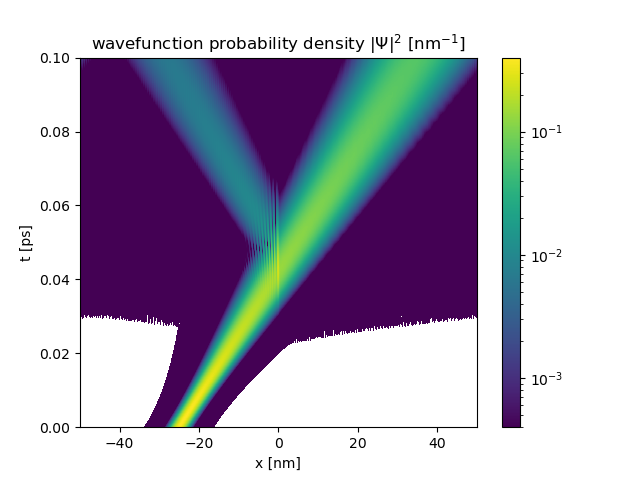

In [22]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import constants


L = 100e-9
L_bar = 0.5e-9
m = constants.m_e # electron mass
hbar = constants.hbar


### integration time and number of samples
t_max = 0.1e-12 # e-12 -> pico seconds
t_nmax = 1000

t = np.linspace(0,t_max,t_nmax+1)
dt = t_max/t_nmax


x_nmax = 10000
x = np.linspace(-L/2.,L/2.,x_nmax+1)

dx = L/(x_nmax) #spatial discretization length

k_grid = np.fft.fftfreq(x_nmax+1, d=dx)*2.*np.pi


### kinetic energy operator in k space
T = k_grid * k_grid * hbar * hbar / (2.*m)

### potential barrier
V_bar = 1.5*constants.e # in eV
Gauss_order = 4
V = V_bar * np.exp(- (0.5 * x**2 / (0.5*L_bar)**2) **Gauss_order )
# V = np.zeros(x.size)
# for k in range(V.size):
#     if (x[k] > -L_bar/2. and x[k] < L_bar/2.):
#         V[k] = V_bar

# plt.plot(x*1e9,V/constants.e)
# plt.xlim(-2*L_bar*1e9,2*L_bar*1e9)
# plt.show()
        
        
# propagators
prop_V = np.exp( (-1.j / hbar) * V * dt)
prop_T = np.exp( (-1.j / hbar) * T * dt)


### initial conditions
x_0 = -(L/2)*0.5 #mean
sigma = L/100 #width
eps0 = 1.0*constants.e
k0 = np.sqrt(2*m*eps0/hbar/hbar) #wave vector
# print(constants.hbar*k0/m)

init = np.zeros(x.size, dtype=complex)
init = np.exp(-0.25 * (x-x_0)**2 / sigma**2 ) * np.exp(1.j*k0*x)
norm = (np.sum( np.abs(init)**2 )*dx)
init /= np.sqrt(norm)
# print(np.sum(np.abs(init)**2)*dx) # make sure the norm works


# plt.plot(x*1e9,V/constants.e)
# plt.plot(x*1e9,np.abs(init)**2*1e-9)
# plt.show()


Psi = np.zeros((t_nmax+1,x_nmax+1), dtype=complex)    
Psi[0] = init

for k in range(1,t_nmax+1):
    Psi[k] = Psi[k-1]
    Psi[k] = Psi[k] * prop_V
    Psi[k] = np.fft.fft(Psi[k])
    Psi[k] = Psi[k] * prop_T
    Psi[k] = np.fft.ifft(Psi[k])

Psi2 = np.abs(Psi)**2


from matplotlib.colors import LogNorm
extent_ar = [-L/2*1e9, L/2*1e9, 0*1e12,t_max*1e12]
plt.imshow(Psi2*1e-9, aspect='auto', interpolation='none', origin='lower', norm=LogNorm(vmin=1e-3*Psi2.max()*1e-9), extent = extent_ar)
# plt.imshow(Psi2*1e-9, aspect='auto', interpolation='none', origin='lower', extent = extent_ar)
plt.xlabel('x [nm]')
plt.ylabel('t [ps]')
plt.title(r'wavefunction probability density $|\Psi|^2$ [nm$^{-1}$]')
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


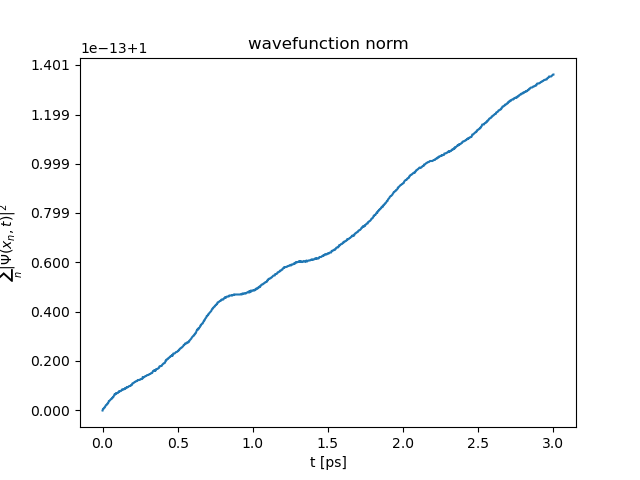

In [9]:
norm_t = np.sum(Psi2, axis=1)*dx
# print(norm_t)
plt.plot(t*1e12,norm_t)
plt.title('wavefunction norm')
plt.xlabel('t [ps]')
plt.ylabel('$\sum_n|\Psi(x_n,t)|^2$')
plt.show()

<IPython.core.display.Javascript object>


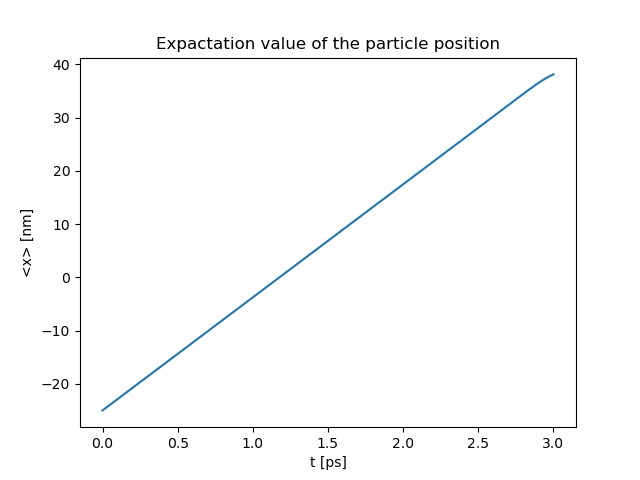

In [10]:
x_mean = np.sum(Psi2 * x, axis=1)*dx
plt.plot(t*1e12,x_mean*1e9)
plt.title('Expactation value of the particle position')
plt.xlabel('t [ps]')
plt.ylabel('<x> [nm]')
plt.show()